<a href="https://colab.research.google.com/github/RobDBennett/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [0]:
# Probability of being drunk!

def prob_drunk_given_positive(prob_drunk_prior):
  p_drunk = prob_drunk_prior
  p_pos_drunk = 1
  p_pos_not_drunk= .08
  p_not_drunk = 1 - p_drunk

  numerator = p_pos_drunk * p_drunk
  denominator = (numerator) + (p_pos_not_drunk*p_not_drunk)
  posterior_p = numerator / denominator
  return posterior_p


In [104]:
prob_drunk_given_positive(1/1000)

0.012357884330202669

In [106]:
prob_drunk_given_positive(0.012357884330202669)

0.13525210993291495

In [117]:
y = 0
x = .001
while x < .95:
  x = prob_drunk_given_positive(x)
  y = y + 1
  print(y, x)
      

1 0.012357884330202669
2 0.13525210993291495
3 0.6615996951348605
4 0.9606895076105054


In [126]:
# 2 visualization differences between Bayes and Frequency.
coinflips = np.random.binomial(1,.5,10000)
coinflips

array([1, 0, 0, ..., 0, 0, 1])

In [0]:
# frequency
def con_int(data):
  confidence=.95
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1+confidence) / 2.0, n-1)
  moe = t*std_err
  lower_bound = mean - moe
  upper_bound = mean + moe
  return (lower_bound, mean, upper_bound) 

In [129]:
freq = con_int(coinflips)
freq

(0.4901985035948205, 0.5, 0.5098014964051796)

In [134]:
bayes, _, _ = stats.bayes_mvs(coinflips, alpha=.95)
bayes

Mean(statistic=0.5, minmax=(0.4902001800772997, 0.5097998199227003))

Frequency v Bayes visualization on 10,000 random coin flips


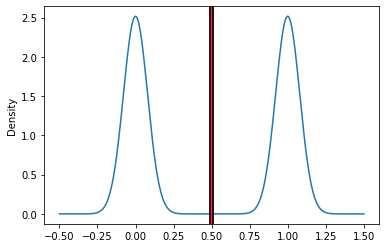

In [145]:
print("Frequency v Bayes visualization on 10,000 random coin flips")
lower1, mean1, upper1 = con_int(coinflips)
lower2 = .4902001800772997
mean2 = .5
upper2 = .5097998199227003
df = pd.DataFrame({'coinflips':coinflips})
df['coinflips'].plot.density()
plt.axvline(x=lower1, color='purple')
plt.axvline(x=mean1, color= 'orange')
plt.axvline(x=upper1, color='purple')

plt.axvline(x=lower2, color='black')
plt.axvline(x=mean2, color='red')
plt.axvline(x=upper2, color='black')
plt.show()

In [0]:
small = np.random.binomial(1,.5,100)

In [147]:
bayes1, _, _ = stats.bayes_mvs(small, alpha=.95)
bayes1

Mean(statistic=0.51, minmax=(0.41030929062808247, 0.6096907093719175))

Frequency v Bayes visualization on 100 random coin flips


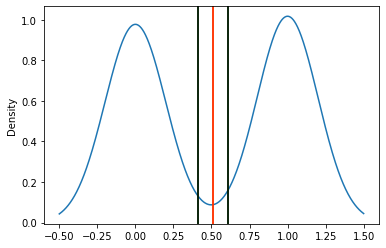

In [149]:
print("Frequency v Bayes visualization on 100 random coin flips")
lower1, mean1, upper1 = con_int(small)
lower2 = .41030929062808247
mean2 = .51
upper2 = .6096907093719175
df1 = pd.DataFrame({'small':small})
df1['small'].plot.density()
plt.axvline(x=lower1, color='green')
plt.axvline(x=mean1, color= 'yellow')
plt.axvline(x=upper1, color='green')

plt.axvline(x=lower2, color='black')
plt.axvline(x=mean2, color='red')
plt.axvline(x=upper2, color='black')
plt.show()

# 3 The difference between Bayes and Frequency Stats:

These seem to be very similar, if we're being honest. They require the same amount of data to be effect. However, the real difference is that frequency stats seem to put the emphasis on the left side of the populations and Bayes focuses on the right populations. 
I am certain that the differences will become more apparent the more I use these, but with a large set of data, they're very close. I repeated the above visualization with 10,000 coinflips and 100 to see if there was a huge difference. 


## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!